# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

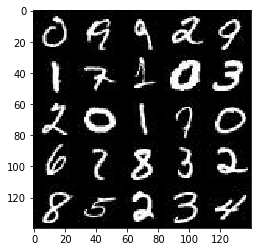

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

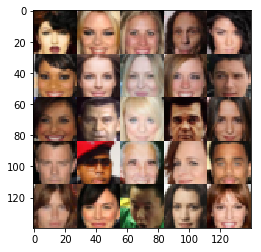

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [17]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    return (tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='real_input')
            , tf.placeholder(tf.float32, shape=[None, z_dim], name='z_input')
            , tf.placeholder(tf.float32, shape=[], name='learning_rate'))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [18]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [19]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*256)
        
        x1 = tf.reshape(x1, (-1, 4, 4, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [20]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='discriminator')):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [36]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    #tf.reset_default_graph()
    sample_z = np.random.uniform(-1, 1, size=(50, z_dim))
    steps = 0
    print_every = 10
    show_every = 100
    
    input_real, input_z, input_learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2 
                
                _ = sess.run(d_opt, feed_dict={input_learning_rate: learning_rate, input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_learning_rate: learning_rate, input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_learning_rate: learning_rate, input_real: batch_images, input_z: batch_z})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_learning_rate: learning_rate, input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_learning_rate: learning_rate, input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 30, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.7209... Generator Loss: 0.4981
Epoch 1/2... Discriminator Loss: 1.7858... Generator Loss: 2.9934
Epoch 1/2... Discriminator Loss: 1.4935... Generator Loss: 0.3712
Epoch 1/2... Discriminator Loss: 1.0748... Generator Loss: 2.3796
Epoch 1/2... Discriminator Loss: 1.8429... Generator Loss: 0.3684
Epoch 1/2... Discriminator Loss: 1.7482... Generator Loss: 0.6034
Epoch 1/2... Discriminator Loss: 1.2324... Generator Loss: 0.7515
Epoch 1/2... Discriminator Loss: 2.1919... Generator Loss: 0.3083
Epoch 1/2... Discriminator Loss: 1.4051... Generator Loss: 0.5822
Epoch 1/2... Discriminator Loss: 2.0978... Generator Loss: 0.7261


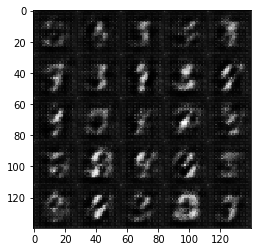

Epoch 1/2... Discriminator Loss: 1.6104... Generator Loss: 0.4712
Epoch 1/2... Discriminator Loss: 1.5174... Generator Loss: 1.0835
Epoch 1/2... Discriminator Loss: 1.3945... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 1.6823... Generator Loss: 1.2462
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 0.5830
Epoch 1/2... Discriminator Loss: 1.4743... Generator Loss: 0.5306
Epoch 1/2... Discriminator Loss: 1.4160... Generator Loss: 0.9439
Epoch 1/2... Discriminator Loss: 1.5932... Generator Loss: 0.3665
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 1.1322
Epoch 1/2... Discriminator Loss: 1.7089... Generator Loss: 0.2739


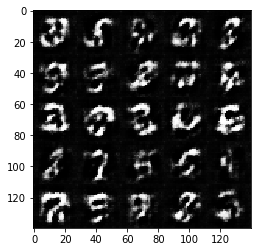

Epoch 1/2... Discriminator Loss: 1.7353... Generator Loss: 1.7883
Epoch 1/2... Discriminator Loss: 1.4042... Generator Loss: 0.4515
Epoch 1/2... Discriminator Loss: 1.4024... Generator Loss: 0.4497
Epoch 1/2... Discriminator Loss: 1.3367... Generator Loss: 0.6909
Epoch 1/2... Discriminator Loss: 1.5219... Generator Loss: 2.0818
Epoch 1/2... Discriminator Loss: 1.2764... Generator Loss: 0.6541
Epoch 1/2... Discriminator Loss: 1.5483... Generator Loss: 1.0873
Epoch 1/2... Discriminator Loss: 1.2977... Generator Loss: 0.9062
Epoch 1/2... Discriminator Loss: 1.5107... Generator Loss: 0.4038
Epoch 1/2... Discriminator Loss: 1.4323... Generator Loss: 0.7227


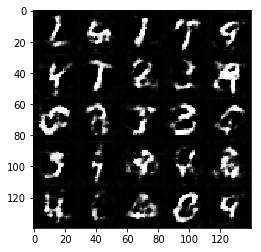

Epoch 1/2... Discriminator Loss: 1.4066... Generator Loss: 0.7446
Epoch 1/2... Discriminator Loss: 1.3637... Generator Loss: 0.5544
Epoch 1/2... Discriminator Loss: 1.5757... Generator Loss: 0.7054
Epoch 1/2... Discriminator Loss: 1.4191... Generator Loss: 0.5023
Epoch 1/2... Discriminator Loss: 1.2776... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.3676... Generator Loss: 0.8846
Epoch 1/2... Discriminator Loss: 1.3081... Generator Loss: 0.8802
Epoch 1/2... Discriminator Loss: 1.2807... Generator Loss: 0.7637
Epoch 1/2... Discriminator Loss: 1.7038... Generator Loss: 1.2010
Epoch 1/2... Discriminator Loss: 1.4049... Generator Loss: 0.5953


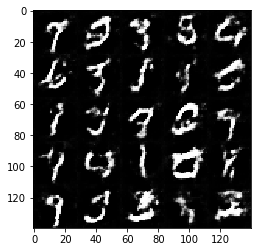

Epoch 1/2... Discriminator Loss: 1.5065... Generator Loss: 0.6831
Epoch 1/2... Discriminator Loss: 1.2838... Generator Loss: 0.7102
Epoch 1/2... Discriminator Loss: 1.3779... Generator Loss: 0.4419
Epoch 1/2... Discriminator Loss: 1.4642... Generator Loss: 0.3677
Epoch 1/2... Discriminator Loss: 1.3795... Generator Loss: 0.6968
Epoch 1/2... Discriminator Loss: 1.5146... Generator Loss: 0.9725
Epoch 1/2... Discriminator Loss: 1.3314... Generator Loss: 0.6111
Epoch 1/2... Discriminator Loss: 1.4877... Generator Loss: 0.5443
Epoch 1/2... Discriminator Loss: 1.6558... Generator Loss: 0.2985
Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.5585


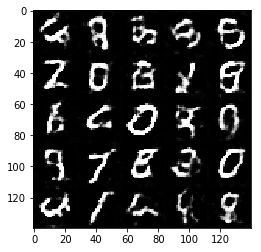

Epoch 1/2... Discriminator Loss: 1.4028... Generator Loss: 1.0710
Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.6106
Epoch 1/2... Discriminator Loss: 1.3193... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 1.5653... Generator Loss: 1.1772
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.4561
Epoch 1/2... Discriminator Loss: 1.4624... Generator Loss: 0.4756
Epoch 1/2... Discriminator Loss: 1.4300... Generator Loss: 0.4382
Epoch 1/2... Discriminator Loss: 2.1289... Generator Loss: 0.1595
Epoch 1/2... Discriminator Loss: 1.2422... Generator Loss: 0.7549
Epoch 1/2... Discriminator Loss: 1.4860... Generator Loss: 0.3836


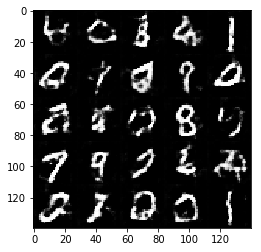

Epoch 1/2... Discriminator Loss: 1.3355... Generator Loss: 0.4697
Epoch 1/2... Discriminator Loss: 1.6372... Generator Loss: 0.3019
Epoch 1/2... Discriminator Loss: 1.2685... Generator Loss: 0.6188
Epoch 1/2... Discriminator Loss: 1.3765... Generator Loss: 0.5093
Epoch 1/2... Discriminator Loss: 1.3637... Generator Loss: 0.8907
Epoch 1/2... Discriminator Loss: 2.7659... Generator Loss: 0.0807
Epoch 1/2... Discriminator Loss: 1.2981... Generator Loss: 0.6710
Epoch 1/2... Discriminator Loss: 1.4345... Generator Loss: 0.4677
Epoch 1/2... Discriminator Loss: 1.5884... Generator Loss: 1.5079
Epoch 1/2... Discriminator Loss: 1.1628... Generator Loss: 0.8706


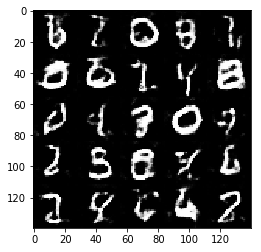

Epoch 1/2... Discriminator Loss: 1.4140... Generator Loss: 0.3713
Epoch 1/2... Discriminator Loss: 1.1325... Generator Loss: 1.0142
Epoch 1/2... Discriminator Loss: 2.6915... Generator Loss: 0.0847
Epoch 1/2... Discriminator Loss: 1.1786... Generator Loss: 0.6762
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 0.8185
Epoch 1/2... Discriminator Loss: 1.2530... Generator Loss: 0.5032
Epoch 1/2... Discriminator Loss: 1.8845... Generator Loss: 0.2041
Epoch 1/2... Discriminator Loss: 1.5560... Generator Loss: 0.5824
Epoch 1/2... Discriminator Loss: 1.1228... Generator Loss: 0.7525
Epoch 1/2... Discriminator Loss: 2.5491... Generator Loss: 0.0963


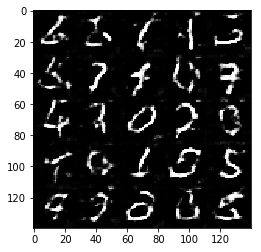

Epoch 1/2... Discriminator Loss: 1.3643... Generator Loss: 0.5407
Epoch 1/2... Discriminator Loss: 1.1336... Generator Loss: 0.5887
Epoch 1/2... Discriminator Loss: 1.5259... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 1.2029... Generator Loss: 0.9403
Epoch 1/2... Discriminator Loss: 1.2236... Generator Loss: 0.6082
Epoch 1/2... Discriminator Loss: 1.4663... Generator Loss: 0.5212
Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 0.6018
Epoch 1/2... Discriminator Loss: 2.5175... Generator Loss: 0.1160
Epoch 1/2... Discriminator Loss: 1.4103... Generator Loss: 0.4522
Epoch 1/2... Discriminator Loss: 1.4577... Generator Loss: 0.3804


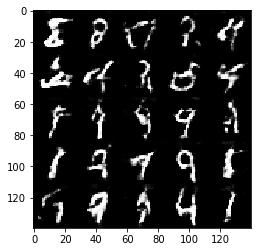

Epoch 1/2... Discriminator Loss: 1.3917... Generator Loss: 0.6711
Epoch 1/2... Discriminator Loss: 1.3644... Generator Loss: 0.4578
Epoch 1/2... Discriminator Loss: 1.3629... Generator Loss: 0.4486
Epoch 1/2... Discriminator Loss: 1.2761... Generator Loss: 0.5304
Epoch 1/2... Discriminator Loss: 1.1753... Generator Loss: 0.6020
Epoch 1/2... Discriminator Loss: 1.3378... Generator Loss: 0.5469
Epoch 1/2... Discriminator Loss: 1.0799... Generator Loss: 0.6768
Epoch 1/2... Discriminator Loss: 1.0275... Generator Loss: 0.7336
Epoch 1/2... Discriminator Loss: 2.3716... Generator Loss: 0.1276
Epoch 1/2... Discriminator Loss: 1.6879... Generator Loss: 0.2536


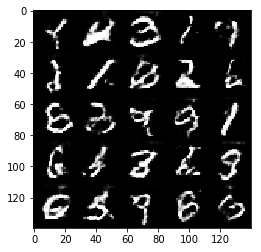

Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 0.7165
Epoch 1/2... Discriminator Loss: 1.4358... Generator Loss: 0.3794
Epoch 1/2... Discriminator Loss: 1.7423... Generator Loss: 0.2880
Epoch 1/2... Discriminator Loss: 1.1952... Generator Loss: 0.9106
Epoch 1/2... Discriminator Loss: 1.4611... Generator Loss: 0.3211
Epoch 1/2... Discriminator Loss: 1.5799... Generator Loss: 0.3382
Epoch 1/2... Discriminator Loss: 2.4502... Generator Loss: 2.0833
Epoch 1/2... Discriminator Loss: 1.3971... Generator Loss: 0.4587
Epoch 1/2... Discriminator Loss: 1.0871... Generator Loss: 0.6137
Epoch 1/2... Discriminator Loss: 1.1935... Generator Loss: 0.5188


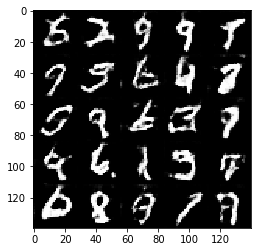

Epoch 1/2... Discriminator Loss: 1.4074... Generator Loss: 0.9551
Epoch 1/2... Discriminator Loss: 1.7890... Generator Loss: 0.3063
Epoch 1/2... Discriminator Loss: 1.3140... Generator Loss: 0.5962
Epoch 1/2... Discriminator Loss: 1.3800... Generator Loss: 2.0458
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.4878
Epoch 1/2... Discriminator Loss: 1.4497... Generator Loss: 0.4035
Epoch 1/2... Discriminator Loss: 1.3089... Generator Loss: 0.5250
Epoch 1/2... Discriminator Loss: 1.5330... Generator Loss: 0.3481
Epoch 1/2... Discriminator Loss: 1.1959... Generator Loss: 0.8752
Epoch 1/2... Discriminator Loss: 1.2434... Generator Loss: 0.5903


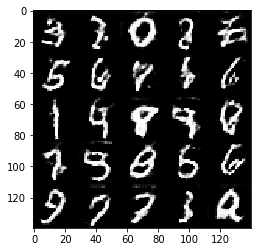

Epoch 1/2... Discriminator Loss: 1.5565... Generator Loss: 0.3037
Epoch 1/2... Discriminator Loss: 1.6421... Generator Loss: 0.2817
Epoch 1/2... Discriminator Loss: 1.7088... Generator Loss: 1.9178
Epoch 1/2... Discriminator Loss: 1.1307... Generator Loss: 0.7066
Epoch 1/2... Discriminator Loss: 1.4690... Generator Loss: 0.4111
Epoch 1/2... Discriminator Loss: 1.4266... Generator Loss: 0.3748
Epoch 1/2... Discriminator Loss: 1.1781... Generator Loss: 0.7074
Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 1.2423
Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 0.3029
Epoch 1/2... Discriminator Loss: 1.2949... Generator Loss: 0.8379


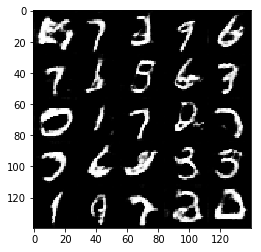

Epoch 1/2... Discriminator Loss: 0.9368... Generator Loss: 0.9978
Epoch 1/2... Discriminator Loss: 1.2406... Generator Loss: 0.5252
Epoch 1/2... Discriminator Loss: 1.1706... Generator Loss: 0.8959
Epoch 1/2... Discriminator Loss: 1.3686... Generator Loss: 0.3741
Epoch 1/2... Discriminator Loss: 1.3683... Generator Loss: 0.4685
Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.5611
Epoch 1/2... Discriminator Loss: 1.3092... Generator Loss: 0.4531
Epoch 1/2... Discriminator Loss: 1.2011... Generator Loss: 0.5280
Epoch 1/2... Discriminator Loss: 1.2088... Generator Loss: 0.4998
Epoch 1/2... Discriminator Loss: 2.4860... Generator Loss: 0.1120


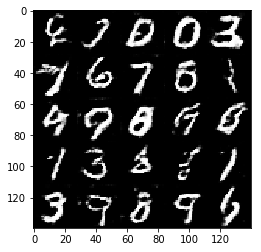

Epoch 1/2... Discriminator Loss: 1.4735... Generator Loss: 0.3730
Epoch 1/2... Discriminator Loss: 1.4647... Generator Loss: 0.3528
Epoch 1/2... Discriminator Loss: 1.1197... Generator Loss: 0.7334
Epoch 1/2... Discriminator Loss: 2.4176... Generator Loss: 0.1253
Epoch 1/2... Discriminator Loss: 1.6374... Generator Loss: 0.2744
Epoch 1/2... Discriminator Loss: 1.1443... Generator Loss: 0.6004
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 0.6766
Epoch 1/2... Discriminator Loss: 1.0254... Generator Loss: 0.8368
Epoch 1/2... Discriminator Loss: 1.2367... Generator Loss: 0.7465
Epoch 1/2... Discriminator Loss: 1.5188... Generator Loss: 0.3471


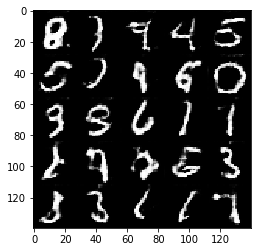

Epoch 1/2... Discriminator Loss: 2.5897... Generator Loss: 0.1076
Epoch 1/2... Discriminator Loss: 2.3430... Generator Loss: 0.1540
Epoch 1/2... Discriminator Loss: 1.6056... Generator Loss: 0.3155
Epoch 1/2... Discriminator Loss: 1.5537... Generator Loss: 0.3263
Epoch 1/2... Discriminator Loss: 1.6509... Generator Loss: 0.3212
Epoch 1/2... Discriminator Loss: 1.5216... Generator Loss: 0.8013
Epoch 1/2... Discriminator Loss: 2.0065... Generator Loss: 0.1878
Epoch 1/2... Discriminator Loss: 1.1467... Generator Loss: 0.5980
Epoch 1/2... Discriminator Loss: 1.4325... Generator Loss: 0.4728
Epoch 1/2... Discriminator Loss: 1.1272... Generator Loss: 1.1852


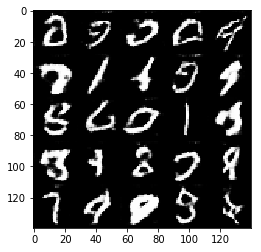

Epoch 1/2... Discriminator Loss: 1.9835... Generator Loss: 0.2115
Epoch 1/2... Discriminator Loss: 1.9183... Generator Loss: 0.2403
Epoch 1/2... Discriminator Loss: 1.3597... Generator Loss: 0.4973
Epoch 1/2... Discriminator Loss: 1.3023... Generator Loss: 0.4452
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.7064
Epoch 1/2... Discriminator Loss: 1.2382... Generator Loss: 0.5143
Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 0.4014
Epoch 1/2... Discriminator Loss: 2.0851... Generator Loss: 0.1975
Epoch 1/2... Discriminator Loss: 2.3757... Generator Loss: 0.1265
Epoch 1/2... Discriminator Loss: 2.2840... Generator Loss: 0.1344


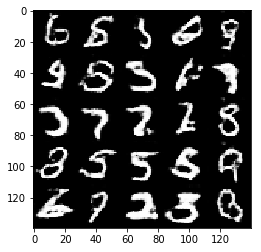

Epoch 1/2... Discriminator Loss: 1.3151... Generator Loss: 0.4065
Epoch 1/2... Discriminator Loss: 1.7423... Generator Loss: 0.2937
Epoch 1/2... Discriminator Loss: 3.0316... Generator Loss: 0.0708
Epoch 1/2... Discriminator Loss: 1.2959... Generator Loss: 0.4683
Epoch 1/2... Discriminator Loss: 0.8343... Generator Loss: 0.9229
Epoch 1/2... Discriminator Loss: 1.4232... Generator Loss: 0.3543
Epoch 1/2... Discriminator Loss: 2.4729... Generator Loss: 0.1093
Epoch 1/2... Discriminator Loss: 0.7916... Generator Loss: 1.0421
Epoch 1/2... Discriminator Loss: 1.9126... Generator Loss: 0.2382
Epoch 1/2... Discriminator Loss: 1.3909... Generator Loss: 0.4465


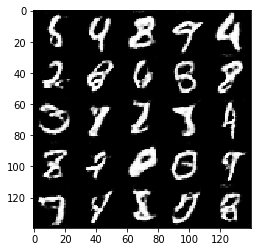

Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 0.4665
Epoch 1/2... Discriminator Loss: 1.3563... Generator Loss: 0.4938
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 0.4473
Epoch 1/2... Discriminator Loss: 1.8915... Generator Loss: 0.2324
Epoch 1/2... Discriminator Loss: 1.5563... Generator Loss: 0.3413
Epoch 1/2... Discriminator Loss: 1.0250... Generator Loss: 0.6824
Epoch 1/2... Discriminator Loss: 1.3946... Generator Loss: 1.9987
Epoch 2/2... Discriminator Loss: 0.8053... Generator Loss: 1.1185
Epoch 2/2... Discriminator Loss: 1.3598... Generator Loss: 0.5192
Epoch 2/2... Discriminator Loss: 1.6706... Generator Loss: 0.2836


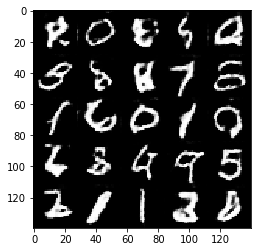

Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 0.8500
Epoch 2/2... Discriminator Loss: 1.0666... Generator Loss: 1.1621
Epoch 2/2... Discriminator Loss: 0.6828... Generator Loss: 1.7989
Epoch 2/2... Discriminator Loss: 1.4978... Generator Loss: 0.3793
Epoch 2/2... Discriminator Loss: 1.1170... Generator Loss: 0.6004
Epoch 2/2... Discriminator Loss: 1.4815... Generator Loss: 0.3485
Epoch 2/2... Discriminator Loss: 1.0941... Generator Loss: 0.7571
Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 1.3075
Epoch 2/2... Discriminator Loss: 0.9086... Generator Loss: 0.9080
Epoch 2/2... Discriminator Loss: 1.3723... Generator Loss: 0.4418


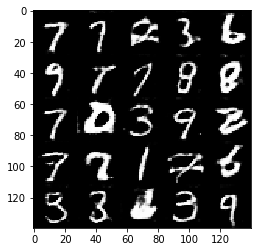

Epoch 2/2... Discriminator Loss: 1.0032... Generator Loss: 0.6307
Epoch 2/2... Discriminator Loss: 1.2792... Generator Loss: 0.4265
Epoch 2/2... Discriminator Loss: 1.7539... Generator Loss: 0.2900
Epoch 2/2... Discriminator Loss: 1.1771... Generator Loss: 0.5115
Epoch 2/2... Discriminator Loss: 1.1173... Generator Loss: 0.5281
Epoch 2/2... Discriminator Loss: 0.9553... Generator Loss: 0.6784
Epoch 2/2... Discriminator Loss: 1.8722... Generator Loss: 0.2236
Epoch 2/2... Discriminator Loss: 1.1831... Generator Loss: 0.5779
Epoch 2/2... Discriminator Loss: 0.9947... Generator Loss: 1.1226
Epoch 2/2... Discriminator Loss: 0.9001... Generator Loss: 1.1201


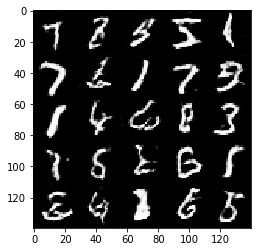

Epoch 2/2... Discriminator Loss: 1.4046... Generator Loss: 0.3888
Epoch 2/2... Discriminator Loss: 2.3645... Generator Loss: 0.1520
Epoch 2/2... Discriminator Loss: 1.3884... Generator Loss: 0.4048
Epoch 2/2... Discriminator Loss: 0.8983... Generator Loss: 0.9534
Epoch 2/2... Discriminator Loss: 1.7891... Generator Loss: 0.2278
Epoch 2/2... Discriminator Loss: 1.6347... Generator Loss: 0.3022
Epoch 2/2... Discriminator Loss: 1.3254... Generator Loss: 0.4389
Epoch 2/2... Discriminator Loss: 1.1786... Generator Loss: 1.3041
Epoch 2/2... Discriminator Loss: 2.3235... Generator Loss: 0.1696
Epoch 2/2... Discriminator Loss: 1.2319... Generator Loss: 0.5871


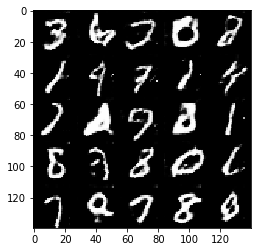

Epoch 2/2... Discriminator Loss: 1.7218... Generator Loss: 0.2621
Epoch 2/2... Discriminator Loss: 1.0199... Generator Loss: 0.5888
Epoch 2/2... Discriminator Loss: 1.2759... Generator Loss: 0.4686
Epoch 2/2... Discriminator Loss: 1.0216... Generator Loss: 0.6818
Epoch 2/2... Discriminator Loss: 1.4491... Generator Loss: 0.4172
Epoch 2/2... Discriminator Loss: 1.6077... Generator Loss: 0.2768
Epoch 2/2... Discriminator Loss: 1.2864... Generator Loss: 0.5084
Epoch 2/2... Discriminator Loss: 1.2321... Generator Loss: 1.4650
Epoch 2/2... Discriminator Loss: 1.4777... Generator Loss: 0.4472
Epoch 2/2... Discriminator Loss: 1.4323... Generator Loss: 0.4339


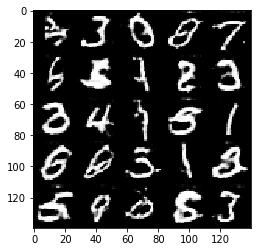

Epoch 2/2... Discriminator Loss: 1.3421... Generator Loss: 0.4576
Epoch 2/2... Discriminator Loss: 1.7024... Generator Loss: 0.2646
Epoch 2/2... Discriminator Loss: 1.6678... Generator Loss: 0.3142
Epoch 2/2... Discriminator Loss: 1.5346... Generator Loss: 0.4156
Epoch 2/2... Discriminator Loss: 0.6962... Generator Loss: 1.3948
Epoch 2/2... Discriminator Loss: 1.4856... Generator Loss: 0.3598
Epoch 2/2... Discriminator Loss: 1.2644... Generator Loss: 0.4610
Epoch 2/2... Discriminator Loss: 1.2889... Generator Loss: 3.2052
Epoch 2/2... Discriminator Loss: 1.4043... Generator Loss: 0.5219
Epoch 2/2... Discriminator Loss: 1.8075... Generator Loss: 0.2933


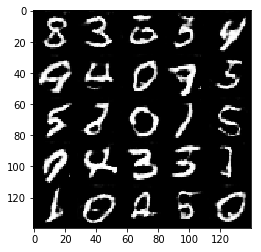

Epoch 2/2... Discriminator Loss: 1.8260... Generator Loss: 0.2403
Epoch 2/2... Discriminator Loss: 1.6845... Generator Loss: 0.3259
Epoch 2/2... Discriminator Loss: 1.2456... Generator Loss: 0.4431
Epoch 2/2... Discriminator Loss: 1.3192... Generator Loss: 0.4413
Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 0.7174
Epoch 2/2... Discriminator Loss: 0.8656... Generator Loss: 0.8112
Epoch 2/2... Discriminator Loss: 1.2561... Generator Loss: 0.4811
Epoch 2/2... Discriminator Loss: 2.0660... Generator Loss: 0.1856
Epoch 2/2... Discriminator Loss: 0.7101... Generator Loss: 1.1223
Epoch 2/2... Discriminator Loss: 0.9311... Generator Loss: 1.0127


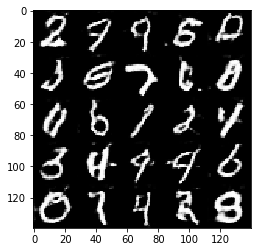

Epoch 2/2... Discriminator Loss: 0.7165... Generator Loss: 1.6334
Epoch 2/2... Discriminator Loss: 1.1596... Generator Loss: 1.1405
Epoch 2/2... Discriminator Loss: 1.3334... Generator Loss: 0.4777
Epoch 2/2... Discriminator Loss: 1.3143... Generator Loss: 0.4776
Epoch 2/2... Discriminator Loss: 1.4210... Generator Loss: 0.3894
Epoch 2/2... Discriminator Loss: 1.5316... Generator Loss: 0.3655
Epoch 2/2... Discriminator Loss: 0.8022... Generator Loss: 1.0903
Epoch 2/2... Discriminator Loss: 0.8512... Generator Loss: 0.7455
Epoch 2/2... Discriminator Loss: 1.4940... Generator Loss: 0.3562
Epoch 2/2... Discriminator Loss: 1.4568... Generator Loss: 0.4089


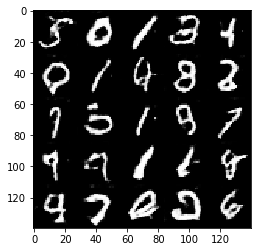

Epoch 2/2... Discriminator Loss: 1.0676... Generator Loss: 0.6904
Epoch 2/2... Discriminator Loss: 1.6448... Generator Loss: 0.2940
Epoch 2/2... Discriminator Loss: 5.7544... Generator Loss: 8.7177
Epoch 2/2... Discriminator Loss: 1.3231... Generator Loss: 1.9367
Epoch 2/2... Discriminator Loss: 1.0924... Generator Loss: 0.6948
Epoch 2/2... Discriminator Loss: 1.2374... Generator Loss: 0.5241
Epoch 2/2... Discriminator Loss: 0.9364... Generator Loss: 0.7366
Epoch 2/2... Discriminator Loss: 1.2690... Generator Loss: 0.5080
Epoch 2/2... Discriminator Loss: 1.7843... Generator Loss: 0.2318
Epoch 2/2... Discriminator Loss: 1.3318... Generator Loss: 0.4783


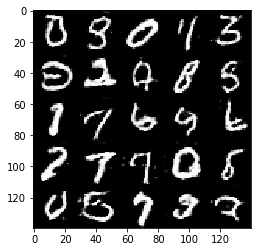

Epoch 2/2... Discriminator Loss: 1.4033... Generator Loss: 2.4677
Epoch 2/2... Discriminator Loss: 1.4639... Generator Loss: 0.4225
Epoch 2/2... Discriminator Loss: 1.7750... Generator Loss: 0.3040
Epoch 2/2... Discriminator Loss: 1.3352... Generator Loss: 0.5025
Epoch 2/2... Discriminator Loss: 1.5178... Generator Loss: 0.4213
Epoch 2/2... Discriminator Loss: 1.6935... Generator Loss: 0.3182
Epoch 2/2... Discriminator Loss: 1.5826... Generator Loss: 0.3280
Epoch 2/2... Discriminator Loss: 1.5513... Generator Loss: 0.3289
Epoch 2/2... Discriminator Loss: 1.6888... Generator Loss: 0.2822
Epoch 2/2... Discriminator Loss: 0.6171... Generator Loss: 1.4541


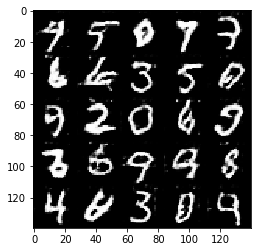

Epoch 2/2... Discriminator Loss: 1.4482... Generator Loss: 0.4265
Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 0.7751
Epoch 2/2... Discriminator Loss: 1.5651... Generator Loss: 0.3903
Epoch 2/2... Discriminator Loss: 1.7472... Generator Loss: 0.2714
Epoch 2/2... Discriminator Loss: 2.2361... Generator Loss: 3.5914
Epoch 2/2... Discriminator Loss: 1.8280... Generator Loss: 0.2517
Epoch 2/2... Discriminator Loss: 1.0647... Generator Loss: 0.6204
Epoch 2/2... Discriminator Loss: 0.8191... Generator Loss: 0.8366
Epoch 2/2... Discriminator Loss: 0.8011... Generator Loss: 1.2072
Epoch 2/2... Discriminator Loss: 1.7963... Generator Loss: 0.2457


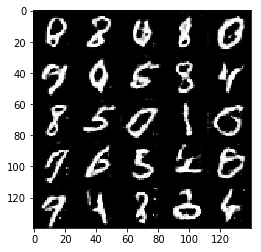

Epoch 2/2... Discriminator Loss: 1.0037... Generator Loss: 0.8299
Epoch 2/2... Discriminator Loss: 0.8302... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 1.2767... Generator Loss: 0.5999
Epoch 2/2... Discriminator Loss: 0.9948... Generator Loss: 0.9226
Epoch 2/2... Discriminator Loss: 1.7364... Generator Loss: 0.3365
Epoch 2/2... Discriminator Loss: 1.1543... Generator Loss: 2.9257
Epoch 2/2... Discriminator Loss: 0.7987... Generator Loss: 1.2158
Epoch 2/2... Discriminator Loss: 3.2296... Generator Loss: 0.0663
Epoch 2/2... Discriminator Loss: 1.1494... Generator Loss: 0.6187
Epoch 2/2... Discriminator Loss: 1.1234... Generator Loss: 0.6929


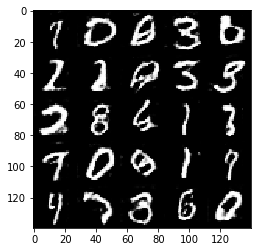

Epoch 2/2... Discriminator Loss: 1.2482... Generator Loss: 0.4749
Epoch 2/2... Discriminator Loss: 1.0123... Generator Loss: 0.6334
Epoch 2/2... Discriminator Loss: 1.0164... Generator Loss: 0.6782
Epoch 2/2... Discriminator Loss: 2.0581... Generator Loss: 0.1983
Epoch 2/2... Discriminator Loss: 1.9027... Generator Loss: 0.2297
Epoch 2/2... Discriminator Loss: 1.0522... Generator Loss: 0.6596
Epoch 2/2... Discriminator Loss: 1.8125... Generator Loss: 0.2652
Epoch 2/2... Discriminator Loss: 1.4405... Generator Loss: 0.3821
Epoch 2/2... Discriminator Loss: 1.6699... Generator Loss: 0.2990
Epoch 2/2... Discriminator Loss: 2.9759... Generator Loss: 0.0834


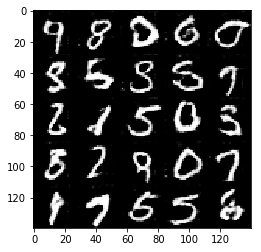

Epoch 2/2... Discriminator Loss: 0.6231... Generator Loss: 1.4584
Epoch 2/2... Discriminator Loss: 1.2059... Generator Loss: 0.4885
Epoch 2/2... Discriminator Loss: 1.1386... Generator Loss: 0.5367
Epoch 2/2... Discriminator Loss: 2.1392... Generator Loss: 0.2072
Epoch 2/2... Discriminator Loss: 1.8092... Generator Loss: 0.3160
Epoch 2/2... Discriminator Loss: 1.1394... Generator Loss: 0.5939
Epoch 2/2... Discriminator Loss: 1.4289... Generator Loss: 0.5018
Epoch 2/2... Discriminator Loss: 1.1259... Generator Loss: 1.1641
Epoch 2/2... Discriminator Loss: 1.1062... Generator Loss: 0.6945
Epoch 2/2... Discriminator Loss: 1.2821... Generator Loss: 0.6462


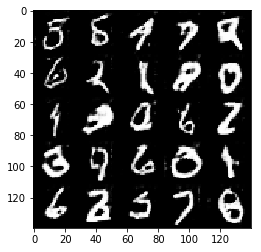

Epoch 2/2... Discriminator Loss: 1.3889... Generator Loss: 0.4531
Epoch 2/2... Discriminator Loss: 1.5411... Generator Loss: 0.4021
Epoch 2/2... Discriminator Loss: 1.3229... Generator Loss: 0.4214
Epoch 2/2... Discriminator Loss: 1.4825... Generator Loss: 0.3680
Epoch 2/2... Discriminator Loss: 1.8445... Generator Loss: 3.8397
Epoch 2/2... Discriminator Loss: 1.1130... Generator Loss: 0.5822
Epoch 2/2... Discriminator Loss: 1.1794... Generator Loss: 0.5573
Epoch 2/2... Discriminator Loss: 1.0998... Generator Loss: 0.6156
Epoch 2/2... Discriminator Loss: 2.6536... Generator Loss: 0.1344
Epoch 2/2... Discriminator Loss: 1.8415... Generator Loss: 0.2714


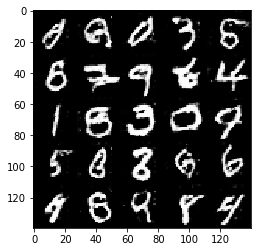

Epoch 2/2... Discriminator Loss: 0.9783... Generator Loss: 0.8777
Epoch 2/2... Discriminator Loss: 1.2770... Generator Loss: 2.0438
Epoch 2/2... Discriminator Loss: 0.7172... Generator Loss: 1.3689
Epoch 2/2... Discriminator Loss: 0.9472... Generator Loss: 0.7212
Epoch 2/2... Discriminator Loss: 1.1296... Generator Loss: 0.6119
Epoch 2/2... Discriminator Loss: 0.8492... Generator Loss: 0.7953
Epoch 2/2... Discriminator Loss: 1.3264... Generator Loss: 0.4046
Epoch 2/2... Discriminator Loss: 2.1036... Generator Loss: 0.2221
Epoch 2/2... Discriminator Loss: 0.8923... Generator Loss: 1.2361
Epoch 2/2... Discriminator Loss: 0.7877... Generator Loss: 1.2001


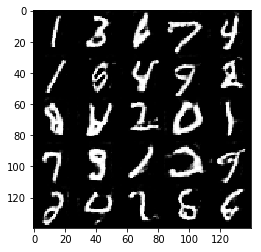

Epoch 2/2... Discriminator Loss: 1.2775... Generator Loss: 0.4420
Epoch 2/2... Discriminator Loss: 1.3741... Generator Loss: 0.4428
Epoch 2/2... Discriminator Loss: 0.9342... Generator Loss: 0.6552
Epoch 2/2... Discriminator Loss: 1.4973... Generator Loss: 0.3792
Epoch 2/2... Discriminator Loss: 0.6515... Generator Loss: 1.1167
Epoch 2/2... Discriminator Loss: 3.4367... Generator Loss: 0.0792
Epoch 2/2... Discriminator Loss: 1.5551... Generator Loss: 0.3633
Epoch 2/2... Discriminator Loss: 0.7316... Generator Loss: 1.6471
Epoch 2/2... Discriminator Loss: 1.7943... Generator Loss: 0.2726
Epoch 2/2... Discriminator Loss: 1.4541... Generator Loss: 0.4777


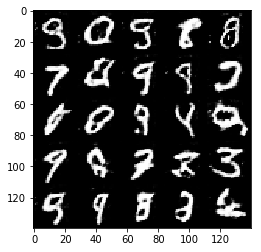

Epoch 2/2... Discriminator Loss: 0.8450... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 1.6236... Generator Loss: 0.4009
Epoch 2/2... Discriminator Loss: 1.0410... Generator Loss: 0.6778
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 0.6521
Epoch 2/2... Discriminator Loss: 1.1046... Generator Loss: 0.5451
Epoch 2/2... Discriminator Loss: 0.9812... Generator Loss: 0.7177
Epoch 2/2... Discriminator Loss: 1.4786... Generator Loss: 0.4194
Epoch 2/2... Discriminator Loss: 2.2087... Generator Loss: 0.1660
Epoch 2/2... Discriminator Loss: 1.0794... Generator Loss: 0.7554
Epoch 2/2... Discriminator Loss: 1.4697... Generator Loss: 0.5683


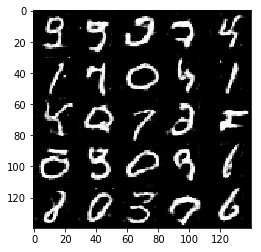

Epoch 2/2... Discriminator Loss: 0.6039... Generator Loss: 1.4756
Epoch 2/2... Discriminator Loss: 1.5683... Generator Loss: 0.3729
Epoch 2/2... Discriminator Loss: 1.7423... Generator Loss: 0.2940
Epoch 2/2... Discriminator Loss: 2.1267... Generator Loss: 0.2286
Epoch 2/2... Discriminator Loss: 0.7605... Generator Loss: 1.2836
Epoch 2/2... Discriminator Loss: 0.7408... Generator Loss: 0.9984
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 0.9797
Epoch 2/2... Discriminator Loss: 1.0779... Generator Loss: 0.5883
Epoch 2/2... Discriminator Loss: 1.1978... Generator Loss: 0.6133
Epoch 2/2... Discriminator Loss: 1.1294... Generator Loss: 0.6240


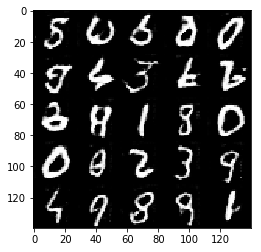

Epoch 2/2... Discriminator Loss: 1.3214... Generator Loss: 0.4985
Epoch 2/2... Discriminator Loss: 0.9173... Generator Loss: 0.7057
Epoch 2/2... Discriminator Loss: 1.5591... Generator Loss: 0.3576
Epoch 2/2... Discriminator Loss: 1.6238... Generator Loss: 0.3138
Epoch 2/2... Discriminator Loss: 0.5089... Generator Loss: 1.4452


In [38]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.2753... Generator Loss: 0.0296
Epoch 1/1... Discriminator Loss: 3.5520... Generator Loss: 0.0506
Epoch 1/1... Discriminator Loss: 3.7904... Generator Loss: 0.0716
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 1.0929
Epoch 1/1... Discriminator Loss: 1.8731... Generator Loss: 0.2460
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 1.0366... Generator Loss: 1.1156
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 1.0927
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 1.6569


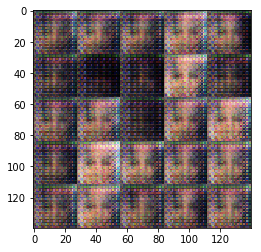

Epoch 1/1... Discriminator Loss: 1.6257... Generator Loss: 1.4090
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.1919... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 2.2908... Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.5734... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.8290... Generator Loss: 0.3880
Epoch 1/1... Discriminator Loss: 1.8367... Generator Loss: 0.5466
Epoch 1/1... Discriminator Loss: 1.7471... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 1.7711... Generator Loss: 0.6203


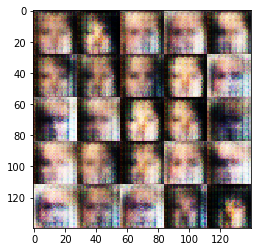

Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.2491... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.9240... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.6818
Epoch 1/1... Discriminator Loss: 1.4769... Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.5245... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.4471... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.4602... Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 1.5273... Generator Loss: 0.6272


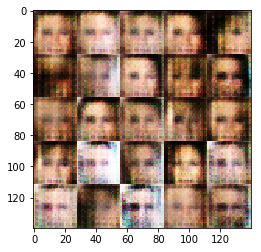

Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.6786... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.6452... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.4999... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.7876


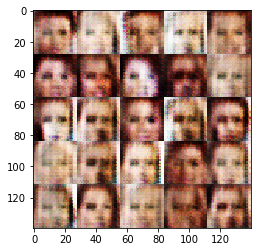

Epoch 1/1... Discriminator Loss: 1.6058... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.4486... Generator Loss: 0.5673
Epoch 1/1... Discriminator Loss: 1.4832... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.5948... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.6673... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.5543... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.5838... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.5524... Generator Loss: 0.5813


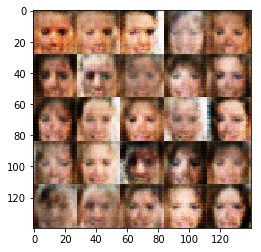

Epoch 1/1... Discriminator Loss: 1.4639... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.6095... Generator Loss: 0.5157
Epoch 1/1... Discriminator Loss: 1.4892... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.7626... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.5407... Generator Loss: 0.5365


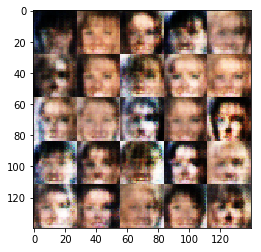

Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.7180
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.5247... Generator Loss: 0.6476
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.5643
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.6877


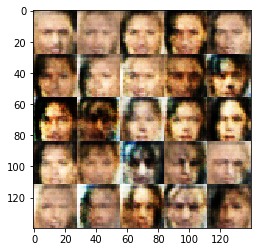

Epoch 1/1... Discriminator Loss: 1.5399... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.6732... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.5573... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.4536... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.6340


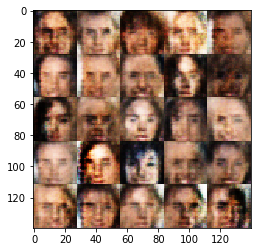

Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.6063... Generator Loss: 0.5957
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.5387... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.4631... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.6885


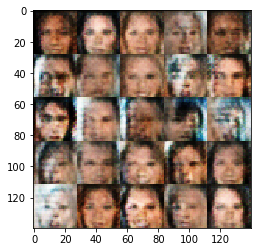

Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.5038... Generator Loss: 0.6725
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4714... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.4642... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.6715


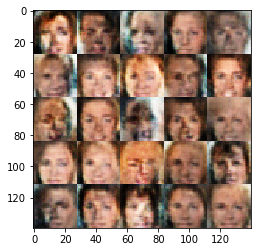

Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.4463... Generator Loss: 0.7283
Epoch 1/1... Discriminator Loss: 1.5392... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.7792
Epoch 1/1... Discriminator Loss: 1.4698... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.4631... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.5837


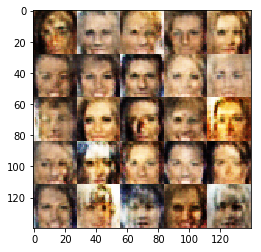

Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.5996... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.4660... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.4465... Generator Loss: 0.6395


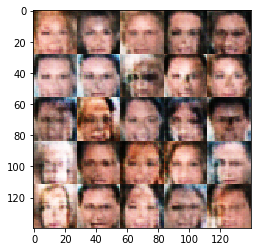

Epoch 1/1... Discriminator Loss: 1.5537... Generator Loss: 0.4738
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.5587
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.7422
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.5971
Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.4595... Generator Loss: 0.5245
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6786


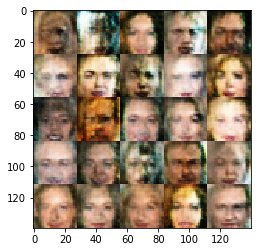

Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.6070
Epoch 1/1... Discriminator Loss: 1.5879... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.5429
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.4725... Generator Loss: 0.7403


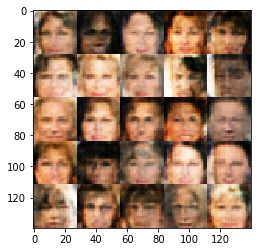

Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.5487... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.6114
Epoch 1/1... Discriminator Loss: 1.5477... Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 1.4885... Generator Loss: 0.6605
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.6604


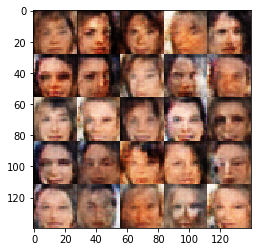

Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.6435
Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.4741... Generator Loss: 0.5700
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.4753... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.4893... Generator Loss: 0.6368


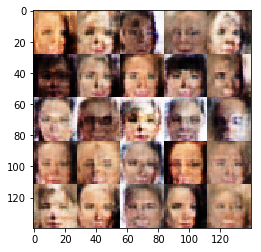

Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 0.5409
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.4769... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.6139


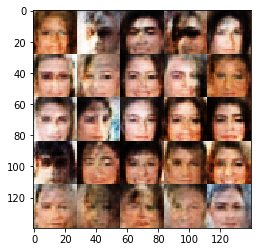

Epoch 1/1... Discriminator Loss: 1.4815... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 1.4299... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6175
Epoch 1/1... Discriminator Loss: 1.4426... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.4660... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6983


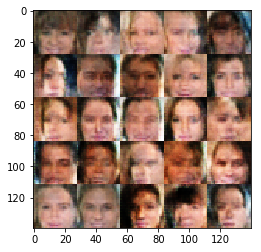

Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.4711... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.4907... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.7176
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.6226


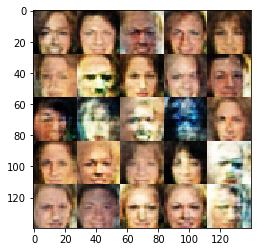

Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.5781... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.5404
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6418


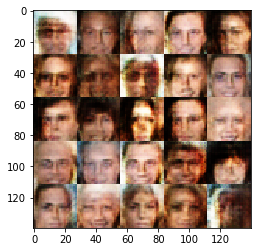

Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.4544... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.4798... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.7260
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.6128


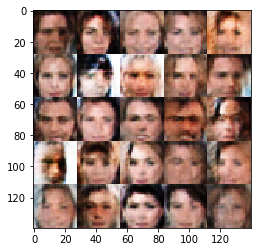

Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.6478
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.6190
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.6138
Epoch 1/1... Discriminator Loss: 1.5145... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7393


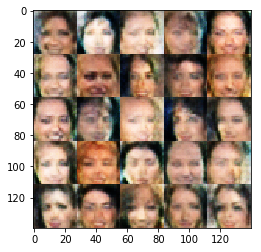

Epoch 1/1... Discriminator Loss: 1.4534... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.6162
Epoch 1/1... Discriminator Loss: 1.4794... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.4858... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7373


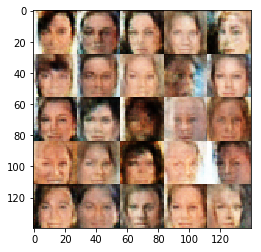

Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.4665... Generator Loss: 0.5164
Epoch 1/1... Discriminator Loss: 1.4559... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.7389
Epoch 1/1... Discriminator Loss: 1.4797... Generator Loss: 0.8159


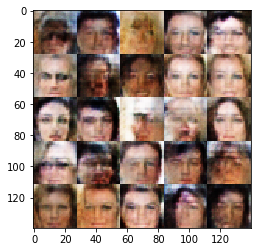

Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.4555... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.5425
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.5955
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.5575
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7409


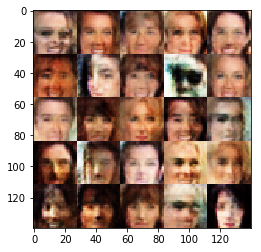

Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.6627
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.5200
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.4299... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.7283
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6075


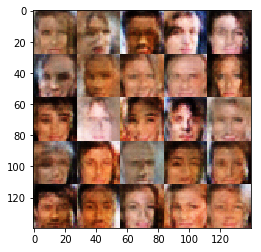

Epoch 1/1... Discriminator Loss: 1.4751... Generator Loss: 0.5681
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.5037... Generator Loss: 0.5936
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.4633... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.4529... Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.6266


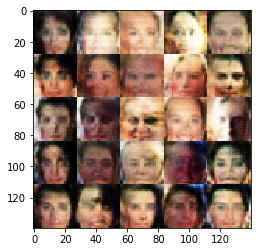

Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.5406... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.5024... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.6110
Epoch 1/1... Discriminator Loss: 1.5456... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.4476... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.6492


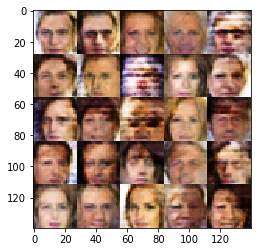

Epoch 1/1... Discriminator Loss: 1.4756... Generator Loss: 0.5465
Epoch 1/1... Discriminator Loss: 1.4828... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.4502... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.5873
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.5698


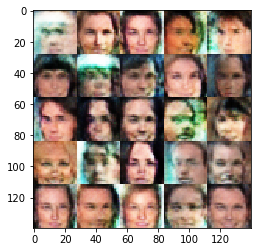

Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.5985
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7415
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.6216


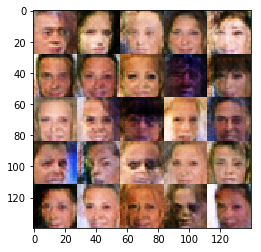

Epoch 1/1... Discriminator Loss: 1.4582... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.5897
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.7114
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.7796


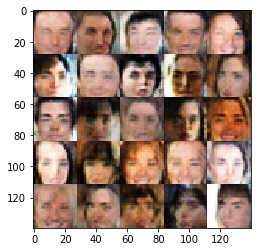

Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.6070


In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.